# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 20.6 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_data.shape)
print(df_data.columns)
print(df_data.isna().values.any())
print(df_data.duplicated().values.any())

(2000, 96)
Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBAR

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [10]:
df_data.loc[df_data.duplicated() == True]

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1000,4693,14.50,12,7.25,0,1,1981,30,20.00,"40,700.00",322.00,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0.10,-0.81,0.32,0.08,0.23,43886,71,231,245,12,12,12.00,nan,1,0,0,0,1,0,1,0,11.00,40,1.15,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1004,4827,38.48,16,8.50,0,1,1981,30,34.00,"27,700.00",174.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0.82,-0.64,-0.06,0.02,-0.75,49221,72,175,180,16,14,16.00,14.00,1,1,0,0,0,1,0,0,4.00,40,7.25,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1006,4176,4.29,16,2.04,0,1,1980,31,23.00,"2,500.00",14.00,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,nan,nan,0.00,0.00,0.00,1.00,nan,nan,...,0.66,-1.23,-2.00,-1.89,-1.50,5465,80,215,220,12,13,nan,13.00,5,0,0,1,0,0,1,0,3.00,70,0.29,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1012,3256,10.00,12,8.02,0,1,1984,27,21.00,"43,000.00",230.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,15.00,15.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.85,-0.38,0.40,0.28,0.43,61863,69,170,190,14,13,14.00,13.00,2,0,1,0,0,0,1,0,nan,25,3.96,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1015,4600,52.00,17,9.08,0,1,1980,31,28.00,"48,900.00",452.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,nan,nan,0.00,1.00,0.00,0.00,0.00,1.00,...,0.39,-1.03,0.49,0.52,0.26,59571,74,185,185,12,12,nan,12.00,2,0,0,0,1,1,0,0,2.00,50,7.62,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2740,14.00,12,12.44,1,0,1980,31,27.00,"81,800.00",413.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,nan,nan,0.00,1.00,0.00,0.00,0.00,1.00,...,-0.54,0.28,-0.74,-0.88,-1.15,22495,67,135,130,12,12,12.00,12.00,2,0,1,0,0,1,0,0,5.00,40,6.46,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",314.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,9.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.26,1.10,0.83,0.80,1.22,76267,67,182,250,12,12,12.00,12.00,1,1,0,0,0,0,1,0,9.00,40,1.10,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",488.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,12.00,nan,0.00,0.00,0.00,1.00,nan,nan,...,1.70,0.91,1.20,1.27,1.60,94859,69,161,141,16,16,16.00,16.00,1,0,0,1,0,0,1,0,8.00,40,4.25,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",549.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,8.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,...,-1.30,-0.56,-0.20,-0.18,-0.15,41186,67,135,140,12,17,12.00,17.00,0,0,0,1,0,0,1,0,7.00,50,4.10,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [13]:
clean_data = df_data.drop_duplicates()
clean_data.duplicated().values.any()

False

## Descriptive Statistics

In [14]:
clean_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00","1,203.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",851.00,698.00,"1,100.00","1,100.00","1,100.00","1,100.00",904.00,904.00,...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,197.00","1,430.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,449.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",362.26,0.67,0.09,0.02,0.18,0.03,0.01,0.20,0.53,0.26,0.01,0.12,0.11,0.77,0.01,0.00,0.08,0.31,0.09,0.39,0.07,0.04,9.80,7.48,0.15,0.40,0.13,0.32,0.17,0.32,...,0.15,0.15,0.21,0.20,0.17,"56,113.32",68.02,168.49,181.56,13.32,13.38,13.60,13.43,2.23,0.17,0.31,0.31,0.21,0.29,0.71,0.00,5.90,39.10,3.56,0.11,0.74,0.08,0.07,0.07,0.12,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",294.23,0.47,0.28,0.14,0.38,0.16,0.12,0.40,0.50,0.44,0.09,0.33,0.32,0.42,0.12,0.05,0.27,0.46,0.29,0.49,0.26,0.19,3.05,3.70,0.36,0.49,0.34,0.47,0.38,0.46,...,0.99,0.97,0.93,0.94,0.94,"27,943.95",4.11,41.62,46.75,2.95,2.63,2.95,2.66,1.72,0.38,0.46,0.46,0.41,0.45,0.45,0.00,3.27,10.90,2.63,0.32,0.44,0.27,0.25,0.25,0.32,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.87,-4.87,-3.05,-2.91,-2.89,0.00,59.00,90.00,90.00,2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,10.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",190.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.51,-0.53,-0.33,-0.37,-0.44,"33,169.50",65.00,140.00,147.00,12.00,12.00,12.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,37.00,1.21,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",302.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.18,0.17,0.29,0.29,0.28,"59,149.00",68.00,160.00,175.00,12.00,13.00,13.00,13.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,40.00,3.10,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",441.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,12.00,10.00,0.00,1.00,0.00,1.00,0.00,1.00,...,0.82,0.82,0.86,0.87,0.84,"80,167.50",71.00,190.00,210.00,16.00,16.00,16.00,16.00,3.00,

## Visualise the Features

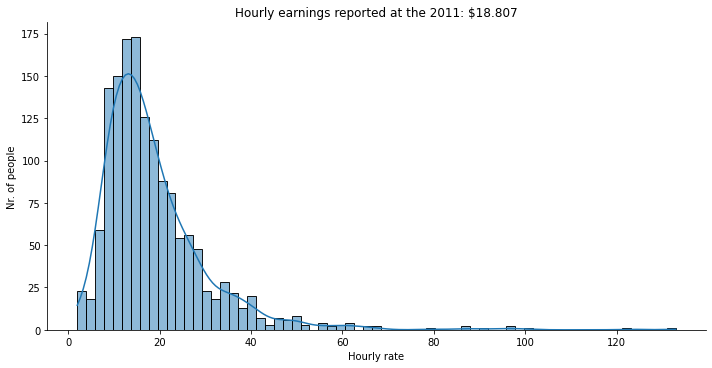

In [17]:
sns.displot(clean_data, x='EARNINGS', aspect=2, kde=True)

plt.title(f'Hourly earnings reported at the 2011: ${(clean_data.EARNINGS.mean()):.6}')
plt.xlabel('Hourly rate')
plt.ylabel('Nr. of people')
plt.show()

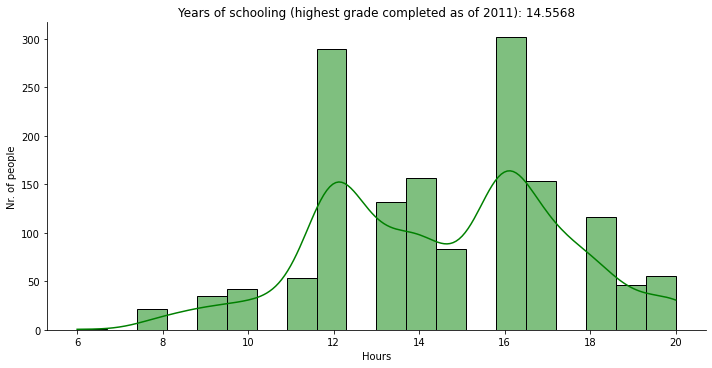

In [23]:
sns.displot(clean_data, x='S', aspect=2, kde=True, color='green')

plt.title(f'Years of schooling (highest grade completed as of 2011): {(clean_data.S.mean()):.6}')
plt.xlabel('Hours')
plt.ylabel('Nr. of people')
plt.show()

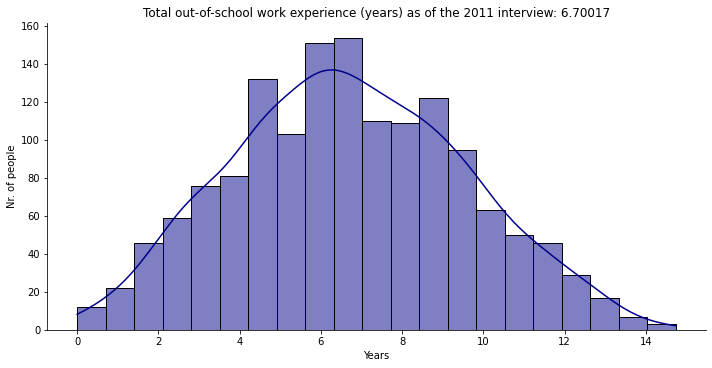

In [24]:
sns.displot(clean_data, x='EXP', aspect=2, kde=True, color='darkblue')

plt.title(f'Total out-of-school work experience (years) as of the 2011 interview: {(clean_data.EXP.mean()):.6}')
plt.xlabel('Years')
plt.ylabel('Nr. of people')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [50]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(clean_data, columns=['S'])
# Response Variable or Target
y = pd.DataFrame(clean_data, columns=['EARNINGS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [52]:
regression = LinearRegression()

regression.fit(X, y)
regression.score(X, y)

0.07923944586935583

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [53]:
coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coef'])
coef

,Coef
S,1.22


In [56]:
coef.loc['S'].values[0]

1.2210596900130288

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [57]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

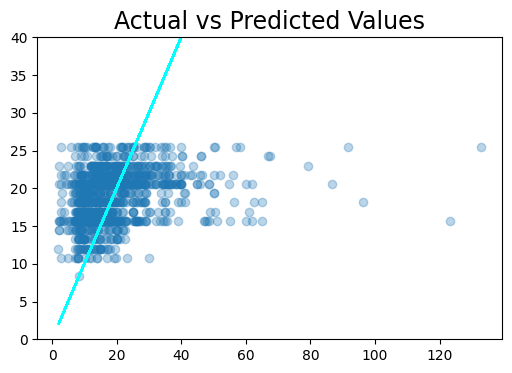

In [65]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, alpha=0.3)
plt.plot(y_train, y_train, color='cyan')
plt.ylim(0,40)
plt.title(f'Actual vs Predicted Values', fontsize=17)
plt.show()

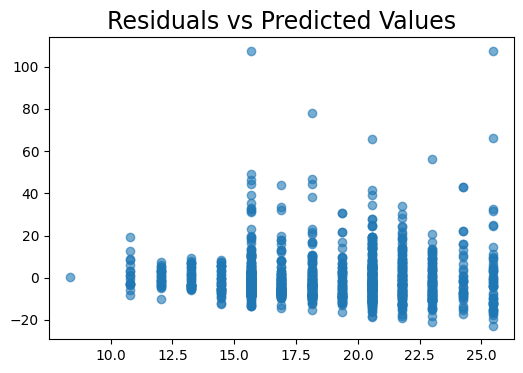

In [59]:
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [68]:
# Explanatory Variable(s) or Feature(s)
features = pd.DataFrame(clean_data, columns=['S','EXP'])
# Response Variable or Target
target = pd.DataFrame(clean_data, columns=['EARNINGS'])
X_train, X_test, multi_y_train, multi_y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [69]:
multi_regr = LinearRegression()
multi_regr.fit(X_train, multi_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate the Coefficients of the Model

In [71]:
multi_regr.fit(features, target)
multi_regr.score(features, target)

0.11125180777359223

### Analyse the Estimated Values & Regression Residuals

In [76]:
predicted_values = multi_regr.predict(X_train)
residuals = (y_train - predicted_values)

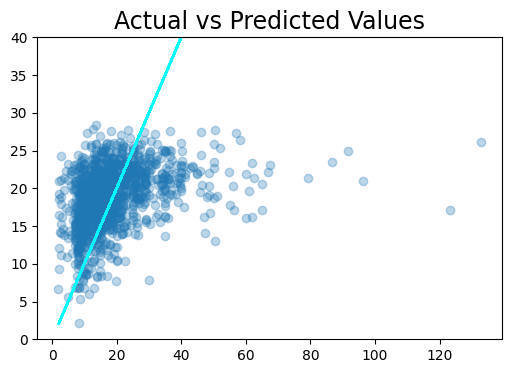

In [77]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, alpha=0.3)
plt.plot(y_train, y_train, color='cyan')
plt.ylim(0,40)
plt.title(f'Actual vs Predicted Values', fontsize=17)
plt.show()

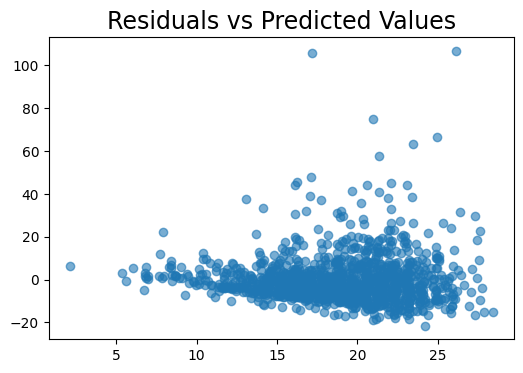

In [78]:
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [81]:
average_vals = features.mean().values
data_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
data_stats

,S,EXP
0,14.56,6.70


In [114]:
data_stats['S'] = 16
data_stats['EXP'] = 5

In [113]:
estimate = multi_regr.predict(data_stats)[0]
print(f'Expected hourly earnings in ${estimate[0]:.3}')

Expected hourly earnings in $18.0


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 